You now have a pretty varied suite of clustering and clustering evaluation methods; we'd be remiss if we didn't give you the opportunity to try them out on some real data. So here we go!

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.



The first task was to try the various clustering algorithms to see what functioned best.  After trying each of the four (K-Means, Mean Shift, Spectral Clustering, and Affinity Propagation) I ended up choosing to go with K-Means due to its more effective clustering and its dramatically faster processing time than the others.

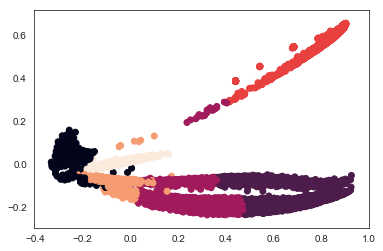

ARI compared to official start time: 0.00018033767725008414


In [54]:
# K-Mean, 6 clusters

Number of estimated clusters: 10


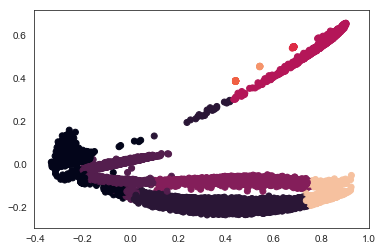




In [138]:
# Mean Shift

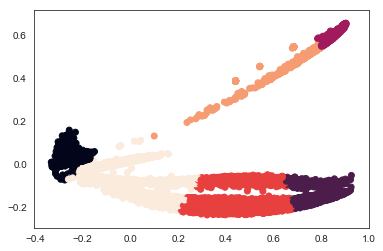




In [12]:
#Spectral Clustering, 6 clusters

Estimated number of clusters: 741


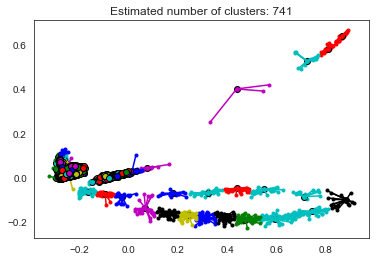




In [22]:
# Affinity Propagation
# Note that this used a 5% sample, rather than the whole dataset.

Because K-Means is so quick to run, even on a medium-sized dataset like this one, it's possible to do multiple runs of it to find out which number of clusters is likely to be most useful.

<function matplotlib.pyplot.show(*args, **kw)>

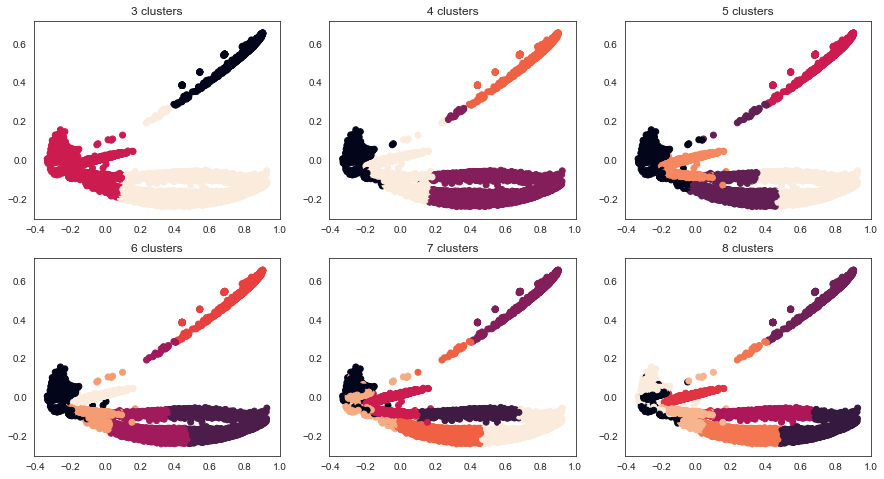

In [177]:
# K-Means clustering of the dataset (visualized using a 2-feature PCA) with various numbers of clusters


In [110]:
# K-Means silhouette scores for the various k's:

Silhouette score for 2k: 0.6043104028164574
Silhouette score for 3k: 0.6245289728687893
Silhouette score for 4k: 0.5173318912945791
Silhouette score for 5k: 0.5169194494978862
Silhouette score for 6k: 0.5120333663276918
Silhouette score for 7k: 0.40460734405136217
Silhouette score for 8k: 0.434077197511332
Silhouette score for 9k: 0.4284885156308257


Silhouette score for Mean Shift: 0.5061924445961735


K-Means with k=3 wins the silhouette score competition.  Now let's check out what the clusters are like.

### Begin the plotting!

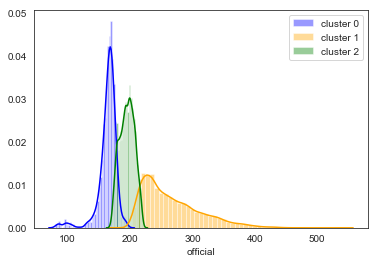

In [121]:
distplot_3_clusters('official')

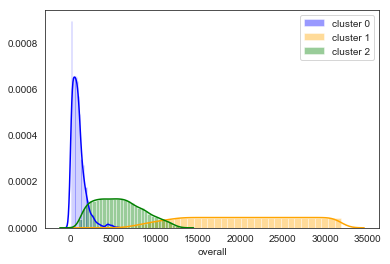

In [122]:
distplot_3_clusters('overall')

Well, the clusters have clearly split into "fastest," "middle," and "slowest" groups.  There's not a clean breaking point between any of them - the "slow" group has some members who place better than the majority of the middle group - but it's still a pretty reasonable-looking split of the dataset by runners' speed.

Note that, as these are distplots, they don't show the relative size of the clusters at all, just the distribution of the datapoints within each of them.

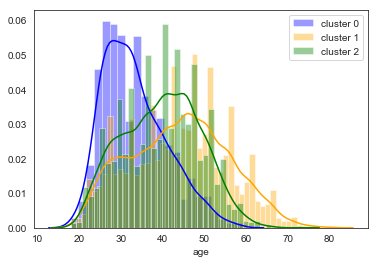

In [123]:
distplot_3_clusters('age')

Age splits significantly less neatly than speed, unsurprisingly.  Each of the clusters has representatives of most age cohorts, with the exception of cluster 0, which has no runners 60 or older.

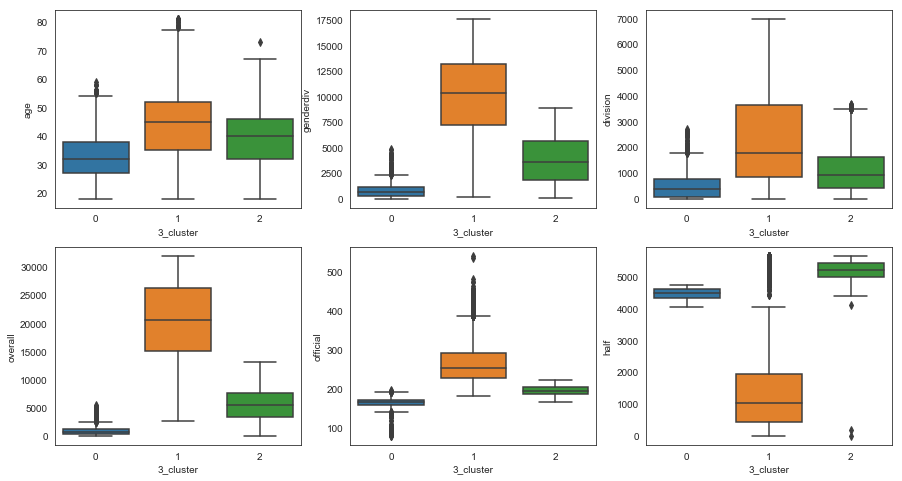

In [124]:
# Boxplots of the six primary features for each of the three clusters

The boxplots just reinforce what we learned in the age & speed distplots; there are distinct 1st, 2nd, and 3rd place clusters, and while the "slowest" cluster (#1, in orange) is also on average the oldest, runners of all ages are spread throughout the three clusters.

The only real surprise here is the performance of cluster 1 in the times at the half-way point of the race - significantly lower than the other two clusters.  I'm unsure if this is just people trying to run a half-marathon and then leaving the longer-haul runners to catch up by the end, or if there's a fault in the data or the way I'm interpreting it.

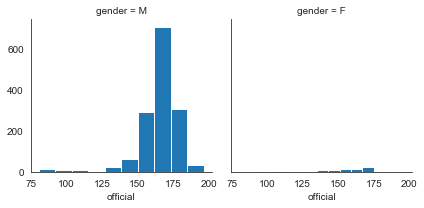

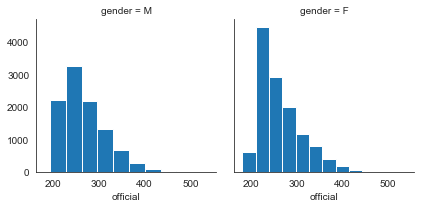

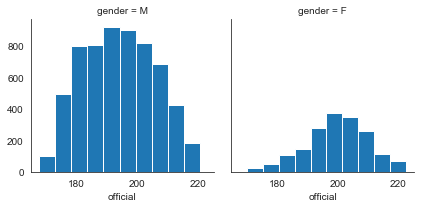

In [170]:
# Facet grid of the three clusters (0, 1, and 2, in descending order), showing official times split by gender

Cluster 0 total male runners: 1458
Cluster 0 total female runners: 72
 
Cluster 1 total male runners: 10024
Cluster 1 total female runners: 12526
 
Cluster 2 total male runners: 6135
Cluster 2 total female runners: 1769


We learn two things from this facetgrid.  One, cluster #1 (in the middle) is by _far_ the larger, with almost three times as many runners in it as cluster #2, and ten times as many runners as cluster #0.

Two, there's distinct gender representation differences between the clusters.  Cluster #1 has slightly more women than men, but cluster 0 and 2 are both _heavily_ tilted towards male runners; 1458:72 in the case of Cluster #0!  Which is odd, given that one would expect women to perform as well as men in a race like this, but the "fast" group is almost entirely male-dominated.

Cluster 0, 1, and 2 in descending order


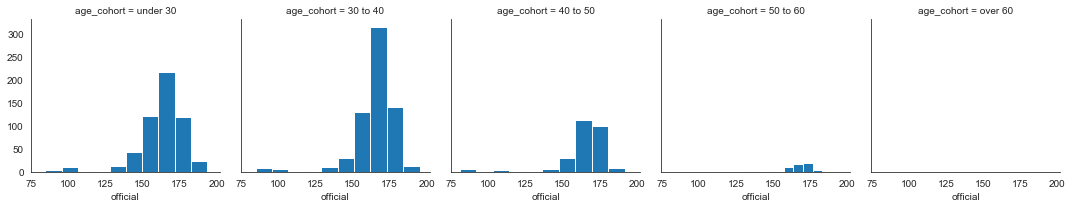

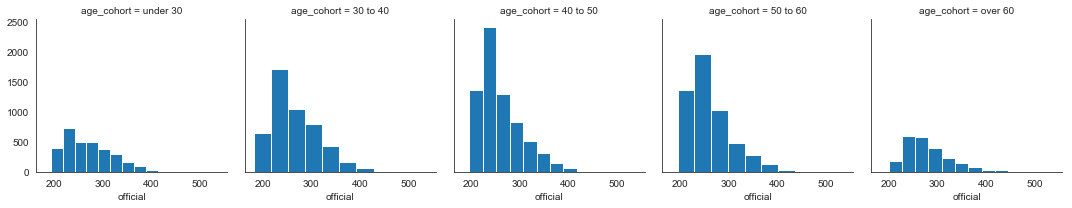

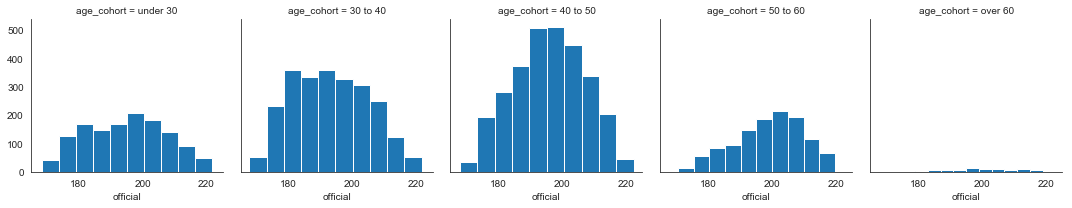

In [175]:
# Facet grid of the three clusters, showing official times split by age cohorts

Cluster 0, 1, and 2 in descending order


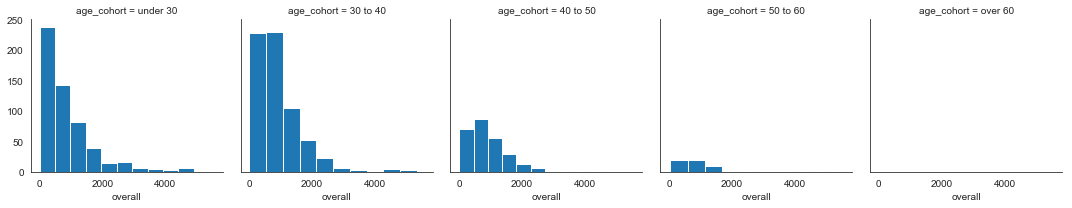

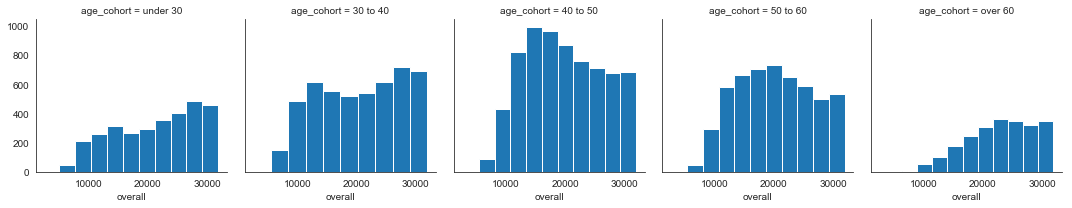

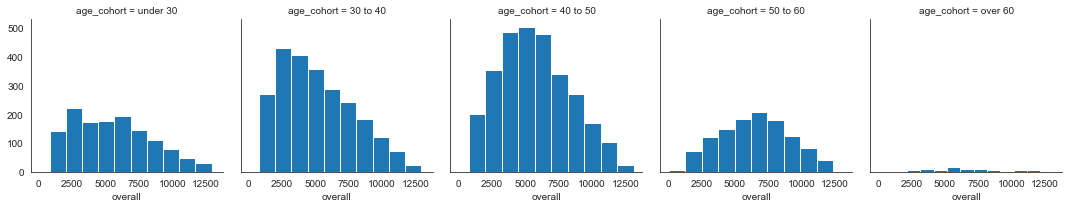

In [176]:
# Facet grid of the three clusters, showing overall rankings split by age cohorts

These two facetgrids show just how true the "slowest, middle, fastest" division is; just looking at the scale that these plots are drawn on, cluster #0 is shifted much lower than cluster #2, which has a noticeably lower scale than cluster #1.  Cluster #0 is also (once again) quite obviously the youngest cluster, with zero members 60 or over, and very few members in the 50 to 60 cohort.  

## Importing code

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from IPython.display import display

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder, Imputer
from sklearn.model_selection import train_test_split

from timeit import default_timer as timer

import os

import pydotplus
from sklearn import tree
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle


## Uploading data

In [48]:
# Upload dataset
marathon_basedata = pd.read_csv('marathon_results.csv')

# Create a new df without name, ctz, state, city, or bib. 
# Reorder the columns while we're at it
working_feature_list = ['official', '40k', '35k', '30k', '25k', 'half',
                        '20k', '10k', '5k','pace', 'overall', 'division',
                        'genderdiv', 'gender', 'age', 'country']
marathon_workingdata = marathon_basedata[working_feature_list].copy()

In [49]:
marathon_workingdata.head(5)


,official,40k,35k,30k,25k,half,20k,10k,5k,pace,overall,division,genderdiv,gender,age,country
0,85.250,80.43,71.40,59.18,47.67,39.72,37.65,17.37,8.02,3.270,8,8,8,M,47,JPN
1,138.950,132.10,116.37,99.33,82.43,69.47,65.83,32.58,16.22,5.300,21,1,1,F,33,KEN
2,80.600,76.10,67.42,56.45,45.80,38.03,36.10,16.62,7.75,3.080,1,1,1,M,41,RSA
3,140.580,132.95,116.37,99.33,82.43,69.47,65.83,32.57,16.20,5.370,27,3,3,F,24,ETH
4,81.230,76.72,67.83,57.03,46.37,38.60,36.58,17.12,8.02,3.100,2,2,2,M,40,JPN


In [5]:
print('Number of rows: ' + str(len(marathon_workingdata.index)))
print('')
print('Number of null values for each feature:')
print(marathon_workingdata.isnull().sum())
print('')
marathon_workingdata.nunique()

Number of rows: 31984

Number of null values for each feature:
official     0
40k          0
35k          0
30k          0
25k          0
half         0
20k          0
10k          0
5k           0
pace         0
overall      0
division     0
genderdiv    0
gender       0
age          0
country      0
dtype: int64



official     11030
40k          10546
35k           9516
30k           8090
25k           6570
half          5651
20k           5375
10k           2766
5k            1491
pace           727
overall      31931
division      6979
genderdiv    17575
gender           2
age             64
country         78
dtype: int64

In [51]:
# A function to encode any non-numeric features, so that models can use them more easily

def encoding_function(marathon_workingdata, features_list):
    selected_data = marathon_workingdata.loc[:, features_list]
    categorical_features = list(selected_data.select_dtypes(include=object).columns)
    for feature in categorical_features:
        encoder = LabelEncoder()
        selected_data[feature] = encoder.fit_transform(selected_data[feature])
    return(selected_data)


In [52]:
marathon_workingdata = marathon_basedata[working_feature_list].copy()
marathon_workingdata = encoding_function(marathon_workingdata, working_feature_list)

In [53]:
X = marathon_workingdata.iloc[:, 1:]
y = marathon_workingdata.iloc[:, 1]

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

X_sample = marathon_sample.iloc[:, 1:]
y_sample = marathon_sample.iloc[:, 1]

# Normalize the data.
X_sample_norm = normalize(X_sample)

# Reduce it to two components.
X_sample_pca = PCA(2).fit_transform(X_sample_norm)


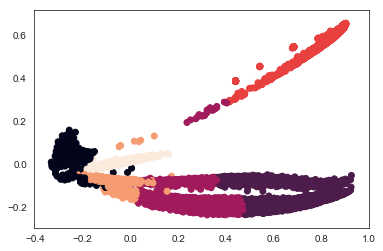

ARI compared to official start time: 0.00018033767725008414


In [54]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(X_norm)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()
print('ARI compared to official start time: ' + str(metrics.adjusted_rand_score(y, y_pred)))

Number of estimated clusters: 10


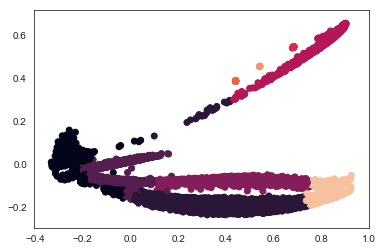




In [113]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

os.system('say "all done."'); print('\a')  # this could take a while, let me know when it's done

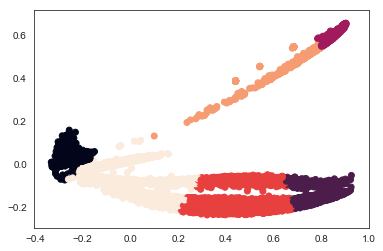




In [12]:
# Declare and fit the model.
sc = SpectralClustering(n_clusters=6)
sc.fit(X_pca)

#Predicted clusters.
predict=sc.fit_predict(X_pca)

#Graph results.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict)
plt.show()

os.system('say "all done."'); print('\a')  # this could take a while, let me know when it's done

Estimated number of clusters: 741


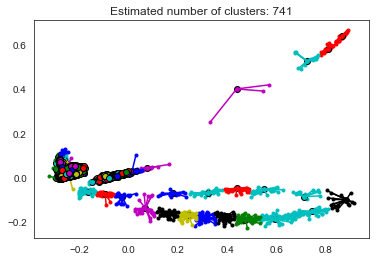




In [22]:
# Note that this is using a 5% sample size, due to the extremely long processing time the full dataset takes.

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_sample_pca)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_sample_pca[cluster_centers_indices[k]]
    plt.plot(X_sample_pca[class_members, 0], X_sample_pca[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_sample_pca[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

os.system('say "all done."'); print('\a')  # this could take a while, let me know when it's done


In [111]:
# Calculate predicted values.
y_pred_3 = KMeans(n_clusters=3, random_state=42).fit_predict(X_norm)
y_pred_4 = KMeans(n_clusters=4, random_state=42).fit_predict(X_norm)
y_pred_5 = KMeans(n_clusters=5, random_state=42).fit_predict(X_norm)
y_pred_6 = KMeans(n_clusters=6, random_state=42).fit_predict(X_norm)
y_pred_7 = KMeans(n_clusters=7, random_state=42).fit_predict(X_norm)
y_pred_8 = KMeans(n_clusters=8, random_state=42).fit_predict(X_norm)
y_pred_9 = KMeans(n_clusters=9, random_state=42).fit_predict(X_norm)

<function matplotlib.pyplot.show(*args, **kw)>

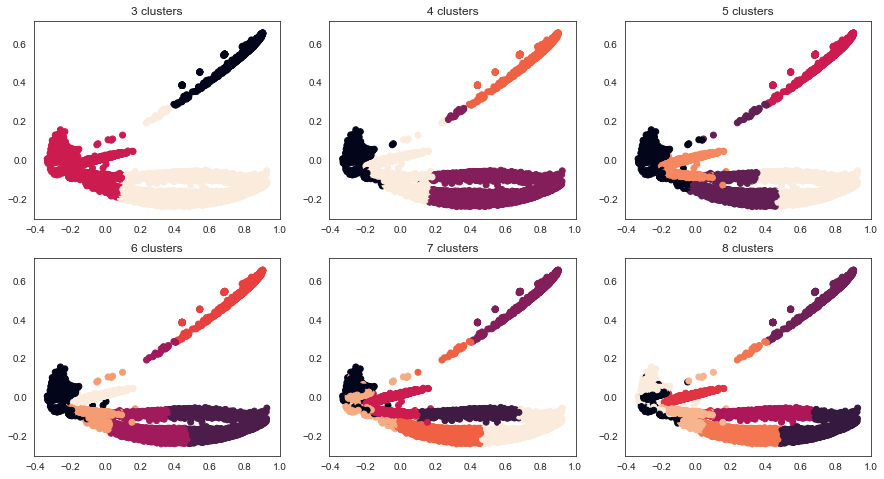

In [112]:
plt.figure(figsize=(15,8))
plt.subplot(2, 3, 1).set_title('3 clusters')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_3)
plt.subplot(2, 3, 2).set_title('4 clusters')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_4)
plt.subplot(2, 3, 3).set_title('5 clusters')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_5)
plt.subplot(2, 3, 4).set_title('6 clusters')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_6)
plt.subplot(2, 3, 5).set_title('7 clusters')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_7)
plt.subplot(2, 3, 6).set_title('8 clusters')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_8)
plt.show


In [115]:
cluster_column_3 = pd.DataFrame(y_pred_3)
marathon_workingdata['3_cluster'] = cluster_column_3

cluster_column_4 = pd.DataFrame(y_pred_4)
marathon_workingdata['4_cluster'] = cluster_column_4

cluster_column_5 = pd.DataFrame(y_pred_5)
marathon_workingdata['5_cluster'] = cluster_column_5

cluster_column_6 = pd.DataFrame(y_pred_6)
marathon_workingdata['6_cluster'] = cluster_column_6

cluster_column_7 = pd.DataFrame(y_pred_7)
marathon_workingdata['7_cluster'] = cluster_column_7

cluster_column_8 = pd.DataFrame(y_pred_8)
marathon_workingdata['8_cluster'] = cluster_column_8

cluster_column_9 = pd.DataFrame(y_pred_9)
marathon_workingdata['9_cluster'] = cluster_column_9



In [116]:
marathon_workingdata.head(5)
# marathon_workingdata  official half pace overall division genderdiv gender age

,official,40k,35k,30k,25k,half,20k,10k,5k,pace,overall,division,genderdiv,gender,age,country,4_cluster,5_cluster,6_cluster,7_cluster,8_cluster,9_cluster,3_cluster
0,85.250,10519,9484,8020,5847,4048,3529,9,1473,3.270,8,8,8,1,47,41,2,2,3,2,2,2,0
1,138.950,33,32,8084,5909,4114,3594,60,37,5.300,21,1,1,0,33,42,2,2,3,2,2,2,0
2,80.600,10513,9478,8016,5844,4045,3525,6,1471,3.080,1,1,1,1,41,59,2,2,3,2,2,2,0
3,140.580,39,32,8084,5909,4114,3594,59,36,5.370,27,3,3,0,24,26,2,2,3,2,2,2,0
4,81.230,10515,9479,8017,5845,4046,3526,7,1473,3.100,2,2,2,1,40,41,2,2,3,2,2,2,0


In [110]:
# comparing ARI performance

y_fit_2 = KMeans(n_clusters=2, random_state=42).fit(X_norm)
y_fit_3 = KMeans(n_clusters=3, random_state=42).fit(X_norm)
y_fit_4 = KMeans(n_clusters=4, random_state=42).fit(X_norm)
y_fit_5 = KMeans(n_clusters=5, random_state=42).fit(X_norm)
y_fit_6 = KMeans(n_clusters=6, random_state=42).fit(X_norm)
y_fit_7 = KMeans(n_clusters=7, random_state=42).fit(X_norm)
y_fit_8 = KMeans(n_clusters=8, random_state=42).fit(X_norm)
y_fit_9 = KMeans(n_clusters=9, random_state=42).fit(X_norm)

labels_2k = y_fit_2.labels_
labels_3k = y_fit_3.labels_
labels_4k = y_fit_4.labels_
labels_5k = y_fit_5.labels_
labels_6k = y_fit_6.labels_
labels_7k = y_fit_7.labels_
labels_8k = y_fit_8.labels_
labels_9k = y_fit_9.labels_

print('Silhouette score for 2k: ' + str(metrics.silhouette_score(X_norm, labels_2k, metric='euclidean')))
print('Silhouette score for 3k: ' + str(metrics.silhouette_score(X_norm, labels_3k, metric='euclidean')))
print('Silhouette score for 4k: ' + str(metrics.silhouette_score(X_norm, labels_4k, metric='euclidean')))
print('Silhouette score for 5k: ' + str(metrics.silhouette_score(X_norm, labels_5k, metric='euclidean')))
print('Silhouette score for 6k: ' + str(metrics.silhouette_score(X_norm, labels_6k, metric='euclidean')))
print('Silhouette score for 7k: ' + str(metrics.silhouette_score(X_norm, labels_7k, metric='euclidean')))
print('Silhouette score for 8k: ' + str(metrics.silhouette_score(X_norm, labels_8k, metric='euclidean')))
print('Silhouette score for 9k: ' + str(metrics.silhouette_score(X_norm, labels_9k, metric='euclidean')))



Silhouette score for 2k: 0.6043104028164574
Silhouette score for 3k: 0.6245289728687893
Silhouette score for 4k: 0.5173318912945791
Silhouette score for 5k: 0.5169194494978862
Silhouette score for 6k: 0.5120333663276918
Silhouette score for 7k: 0.40460734405136217
Silhouette score for 8k: 0.434077197511332
Silhouette score for 9k: 0.4284885156308257


In [114]:
ms.fit(X_norm)
ms_labels = ms.labels_
print('Silhouette score for Mean Shift: ' + str(metrics.silhouette_score(X_norm, ms_labels, metric='euclidean')))


Silhouette score for Mean Shift: 0.5061924445961735


In [28]:
cluster_7_0 = marathon_workingdata.loc[marathon_workingdata['7_cluster'] == 0]
cluster_7_1 = marathon_workingdata.loc[marathon_workingdata['7_cluster'] == 1]
cluster_7_2 = marathon_workingdata.loc[marathon_workingdata['7_cluster'] == 2]
cluster_7_3 = marathon_workingdata.loc[marathon_workingdata['7_cluster'] == 3]
cluster_7_4 = marathon_workingdata.loc[marathon_workingdata['7_cluster'] == 4]
cluster_7_5 = marathon_workingdata.loc[marathon_workingdata['7_cluster'] == 5]
cluster_7_6 = marathon_workingdata.loc[marathon_workingdata['7_cluster'] == 6]


In [101]:
def distplot_7_clusters(feature):
    sns.distplot(cluster_7_0[feature] , color="green")
    sns.distplot(cluster_7_1[feature] , color="orange")
    sns.distplot(cluster_7_2[feature] , color="red")
    sns.distplot(cluster_7_3[feature] , color="skyblue")
    sns.distplot(cluster_7_4[feature] , color="midnightblue")
    sns.distplot(cluster_7_5[feature] , color="maroon")
    sns.distplot(cluster_7_6[feature] , color="lavender")
    plt.legend(['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6'])
    return

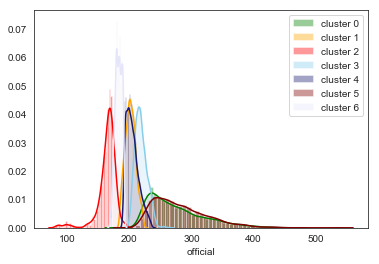

In [102]:
distplot_7_clusters('official')

In [57]:
marathon_5_cluster = marathon_workingdata.drop(['40k', '35k', '30k', '25k', '20k', '10k', '5k', 'country',
                                                '4_cluster', '6_cluster', '7_cluster', '8_cluster', '9_cluster'],
                                               axis=1)
marathon_5_cluster['gender'] = marathon_basedata['gender']

In [32]:

cluster_5_0 = marathon_5_cluster.loc[marathon_5_cluster['5_cluster'] == 0]
cluster_5_1 = marathon_5_cluster.loc[marathon_5_cluster['5_cluster'] == 1]
cluster_5_2 = marathon_5_cluster.loc[marathon_5_cluster['5_cluster'] == 2]
cluster_5_3 = marathon_5_cluster.loc[marathon_5_cluster['5_cluster'] == 3]
cluster_5_4 = marathon_5_cluster.loc[marathon_5_cluster['5_cluster'] == 4]


In [103]:
def distplot_5_clusters(feature):
    sns.distplot(cluster_5_0[feature] , color="blue")
    sns.distplot(cluster_5_1[feature] , color="orange")
    sns.distplot(cluster_5_2[feature] , color="green")
    sns.distplot(cluster_5_3[feature] , color="red")
    sns.distplot(cluster_5_4[feature] , color="purple")
    plt.legend(['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'])
    return

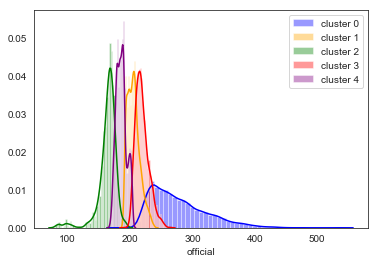

In [104]:
distplot_5_clusters('official')

In [151]:
marathon_3_cluster = marathon_workingdata.drop(['40k', '35k', '30k', '25k', '20k', '10k', '5k', 'country',
                                                '4_cluster', '5_cluster', '6_cluster', '7_cluster', '8_cluster', '9_cluster'],
                                               axis=1)
marathon_3_cluster['gender'] = marathon_basedata['gender']

In [120]:

cluster_3_0 = marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 0]
cluster_3_1 = marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 1]
cluster_3_2 = marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 2]


In [119]:
def distplot_3_clusters(feature):
    sns.distplot(cluster_3_0[feature] , color="blue")
    sns.distplot(cluster_3_1[feature] , color="orange")
    sns.distplot(cluster_3_2[feature] , color="green")
    plt.legend(['cluster 0', 'cluster 1', 'cluster 2'])
    return

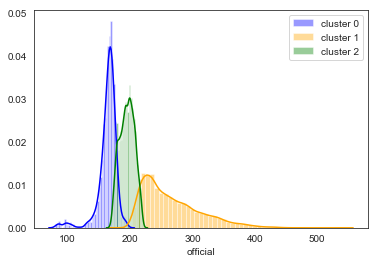

In [121]:
distplot_3_clusters('official')

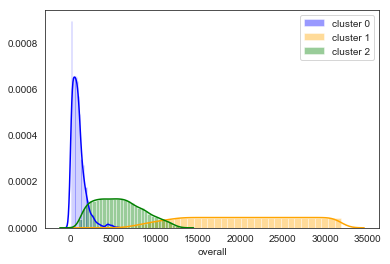

In [122]:
distplot_3_clusters('overall')

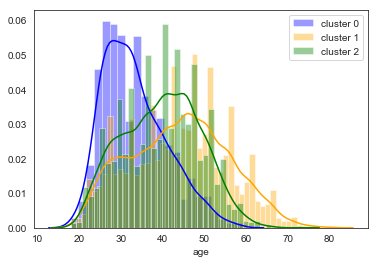

In [123]:
distplot_3_clusters('age')

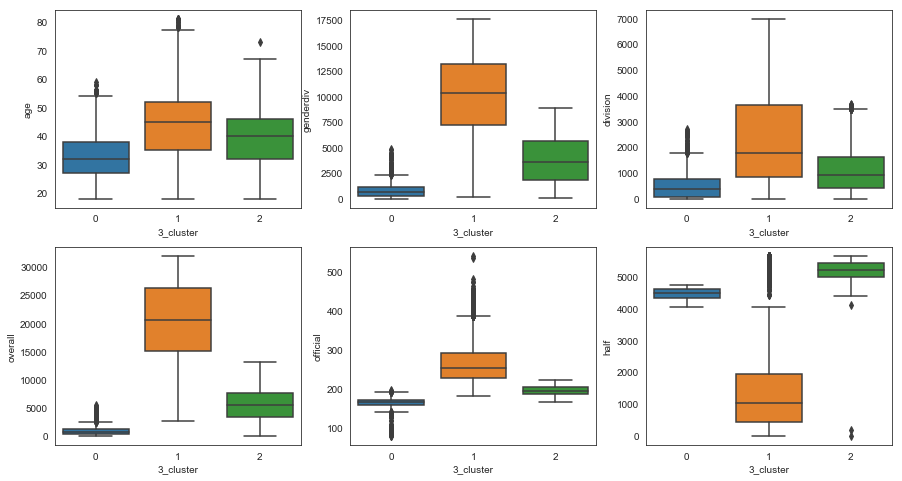

In [124]:
plt.figure(figsize=(15,8))
plt.subplot(2, 3, 1)
sns.boxplot(x='3_cluster', y='age', data=marathon_3_cluster)
plt.subplot(2, 3, 2)
sns.boxplot(x='3_cluster', y='genderdiv', data=marathon_3_cluster)
plt.subplot(2, 3, 3)
sns.boxplot(x='3_cluster', y='division', data=marathon_3_cluster)
plt.subplot(2, 3, 4)
sns.boxplot(x='3_cluster', y='overall', data=marathon_3_cluster)
plt.subplot(2, 3, 5)
sns.boxplot(x='3_cluster', y='official', data=marathon_3_cluster)
plt.subplot(2, 3, 6)
sns.boxplot(x='3_cluster', y='half', data=marathon_3_cluster)


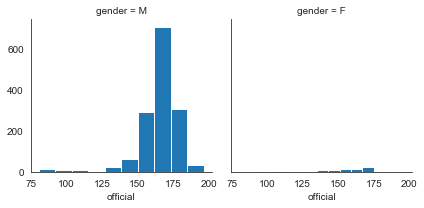

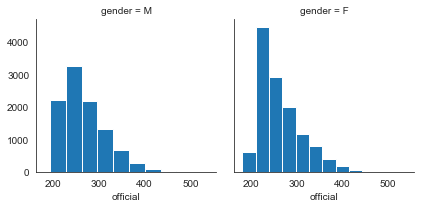

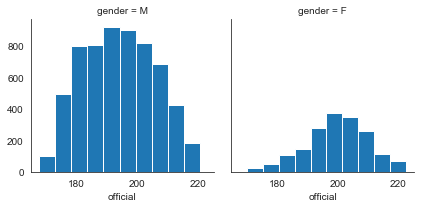

In [170]:
gender_order = ['M','F']
g = sns.FacetGrid(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 0], 
                  col="gender",
                 col_order = gender_order)
g.map(plt.hist, "official")
g = sns.FacetGrid(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 1], 
                  col="gender",
                 col_order = gender_order)
g.map(plt.hist, "official")
g = sns.FacetGrid(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 2], 
                  col="gender",
                 col_order = gender_order)
g.map(plt.hist, "official")


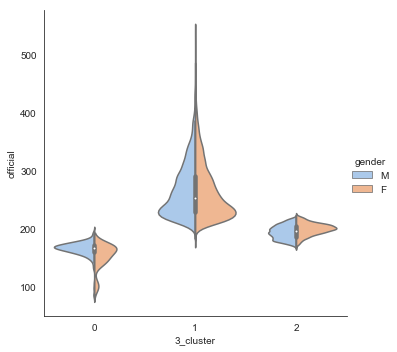

In [126]:
sns.catplot(x="3_cluster", y="official", hue="gender",
            kind="violin", split=True,
            palette="pastel", data=marathon_3_cluster)


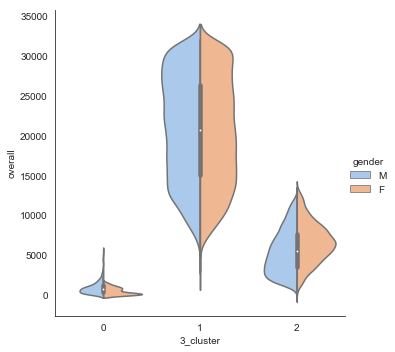

In [127]:
sns.catplot(x="3_cluster", y="overall", hue="gender",
            kind="violin", split=True,
            palette="pastel", data=marathon_3_cluster)


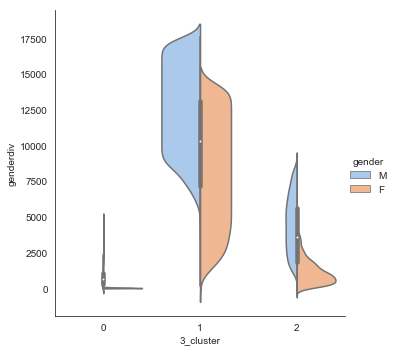

In [128]:
sns.catplot(x="3_cluster", y="genderdiv", hue="gender",
            kind="violin", split=True,
            palette="pastel", data=marathon_3_cluster)


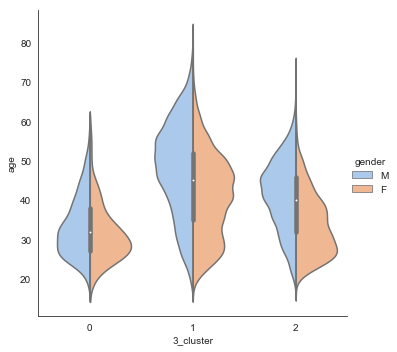

In [129]:
sns.catplot(x="3_cluster", y="age", hue="gender",
            kind="violin", split=True,
            palette="pastel", data=marathon_3_cluster)


In [136]:
# cluster_3_0 = marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 0]
# cluster_3_1 = marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 1]
# cluster_3_2 = marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 2]

cluster_3_0_under_30 = cluster_3_0.loc[cluster_3_0['age'] < 30]
cluster_3_0_30to40 = cluster_3_0.loc[(cluster_3_0['age'] >= 30) & (cluster_3_0['age'] < 40)]
cluster_3_0_40to50 = cluster_3_0.loc[(cluster_3_0['age'] >= 40) & (cluster_3_0['age'] < 50)]
cluster_3_0_50to60 = cluster_3_0.loc[(cluster_3_0['age'] >= 50) & (cluster_3_0['age'] < 60)]
cluster_3_0_over_60 = cluster_3_0.loc[cluster_3_0['age'] > 60]

cluster_3_1_under_30 = cluster_3_1.loc[cluster_3_1['age'] < 30]
cluster_3_1_30to40 = cluster_3_1.loc[(cluster_3_1['age'] >= 30) & (cluster_3_1['age'] < 40)]
cluster_3_1_40to50 = cluster_3_1.loc[(cluster_3_1['age'] >= 40) & (cluster_3_1['age'] < 50)]
cluster_3_1_50to60 = cluster_3_1.loc[(cluster_3_1['age'] >= 50) & (cluster_3_1['age'] < 60)]
cluster_3_1_over_60 = cluster_3_1.loc[cluster_3_1['age'] > 60]

cluster_3_2_under_30 = cluster_3_2.loc[cluster_3_2['age'] < 30]
cluster_3_2_30to40 = cluster_3_2.loc[(cluster_3_2['age'] >= 30) & (cluster_3_2['age'] < 40)]
cluster_3_2_40to50 = cluster_3_2.loc[(cluster_3_2['age'] >= 40) & (cluster_3_2['age'] < 50)]
cluster_3_2_50to60 = cluster_3_2.loc[(cluster_3_2['age'] >= 50) & (cluster_3_2['age'] < 60)]
cluster_3_2_over_60 = cluster_3_2.loc[cluster_3_2['age'] > 60]


In [139]:
def distplot_ageseparated_3_0(feature):
    sns.distplot(cluster_3_0_under_30[feature] , color="blue")
    sns.distplot(cluster_3_0_30to40[feature] , color="orange")
    sns.distplot(cluster_3_0_40to50[feature] , color="green")
    sns.distplot(cluster_3_0_50to60[feature] , color="red")
    sns.distplot(cluster_3_0_over_60[feature] , color="purple")
    plt.legend(['under 30', '30 to 40', '40 to 50', '50 to 60', 'over 60'])
    return

def distplot_ageseparated_3_1(feature):
    sns.distplot(cluster_3_1_under_30[feature] , color="blue")
    sns.distplot(cluster_3_1_30to40[feature] , color="orange")
    sns.distplot(cluster_3_1_40to50[feature] , color="green")
    sns.distplot(cluster_3_1_50to60[feature] , color="red")
    sns.distplot(cluster_3_1_over_60[feature] , color="purple")
    plt.legend(['under 30', '30 to 40', '40 to 50', '50 to 60', 'over 60'])
    return

def distplot_ageseparated_3_2(feature):
    sns.distplot(cluster_3_2_under_30[feature] , color="blue")
    sns.distplot(cluster_3_2_30to40[feature] , color="orange")
    sns.distplot(cluster_3_2_40to50[feature] , color="green")
    sns.distplot(cluster_3_2_50to60[feature] , color="red")
    sns.distplot(cluster_3_2_over_60[feature] , color="purple")
    plt.legend(['under 30', '30 to 40', '40 to 50', '50 to 60', 'over 60'])
    return

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


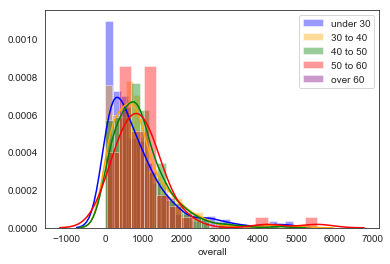

In [138]:
distplot_ageseparated_3_0('overall')

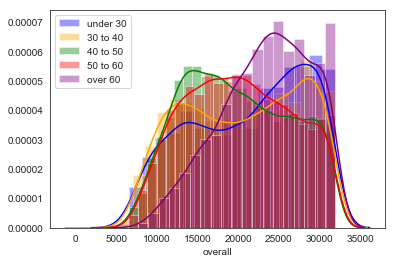

In [140]:
distplot_ageseparated_3_1('overall')

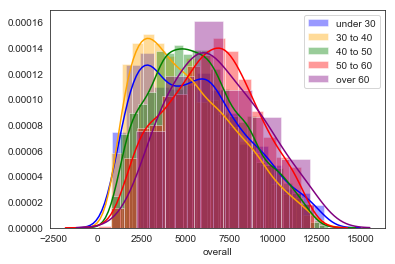

In [141]:
distplot_ageseparated_3_2('overall')

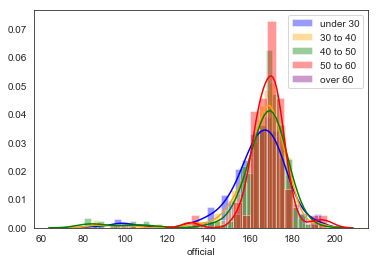

In [142]:
distplot_ageseparated_3_0('official')

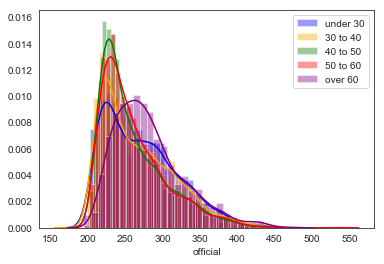

In [143]:
distplot_ageseparated_3_1('official')

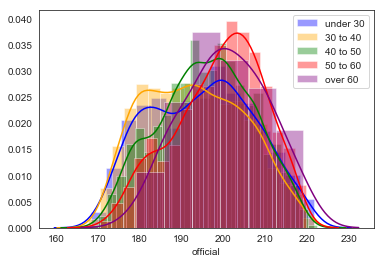

In [144]:
distplot_ageseparated_3_2('official')

In [157]:
marathon_3_cluster['age_cohort'] = 'unknown'
marathon_3_cluster['age_cohort'].loc[
    (marathon_3_cluster['age'] < 30)] = 'under 30'
marathon_3_cluster['age_cohort'].loc[
    (marathon_3_cluster['age'] >= 30) & 
    (marathon_3_cluster['age'] < 40)] = '30 to 40'
marathon_3_cluster['age_cohort'].loc[
    (marathon_3_cluster['age'] >= 40) & 
    (marathon_3_cluster['age'] < 50)] = '40 to 50'
marathon_3_cluster['age_cohort'].loc[
    (marathon_3_cluster['age'] >= 50) & 
    (marathon_3_cluster['age'] < 60)] = '50 to 60'
marathon_3_cluster['age_cohort'].loc[
    (marathon_3_cluster['age'] >= 60)] = 'over 60'


In [159]:
marathon_3_cluster.head(5)

,official,half,pace,overall,division,genderdiv,gender,age,3_cluster,age_cohort
0,85.250,4048,3.270,8,8,8,M,47,0,40 to 50
1,138.950,4114,5.300,21,1,1,F,33,0,30 to 40
2,80.600,4045,3.080,1,1,1,M,41,0,40 to 50
3,140.580,4114,5.370,27,3,3,F,24,0,under 30
4,81.230,4046,3.100,2,2,2,M,40,0,40 to 50


Cluster 0, 1, and 2 in descending order


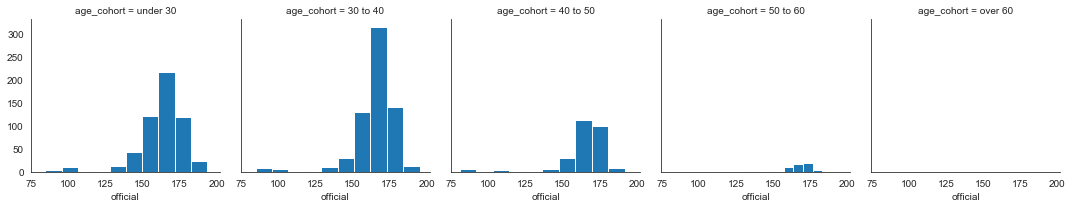

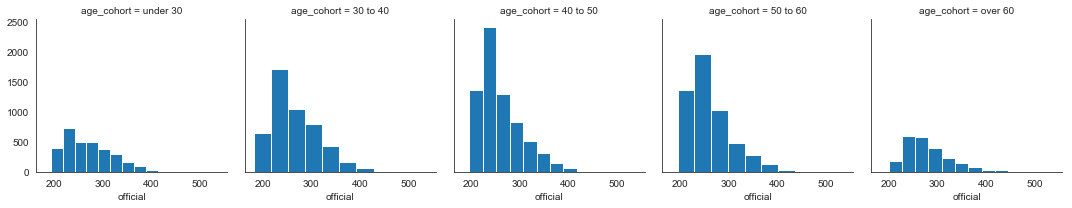

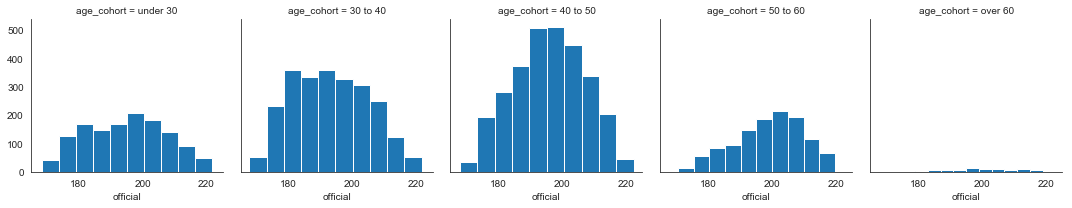

In [175]:
age_cohort_order = ['under 30', '30 to 40', '40 to 50', '50 to 60', 'over 60']

print('Cluster 0, 1, and 2 in descending order')
g = sns.FacetGrid(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 0], 
                  col="age_cohort", 
                  col_order=age_cohort_order)
g.map(plt.hist, "official")
g = sns.FacetGrid(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 1], 
                  col="age_cohort", 
                  col_order=age_cohort_order)
g.map(plt.hist, "official")
g = sns.FacetGrid(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 2], 
                  col="age_cohort", 
                  col_order=age_cohort_order)
g.map(plt.hist, "official")


Cluster 0, 1, and 2 in descending order


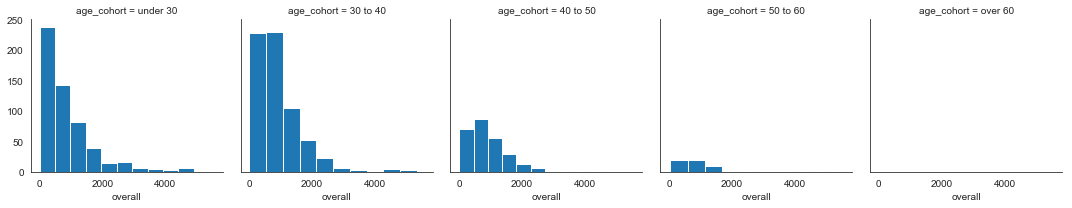

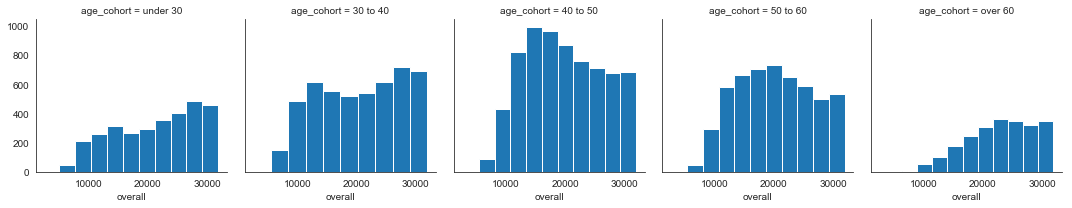

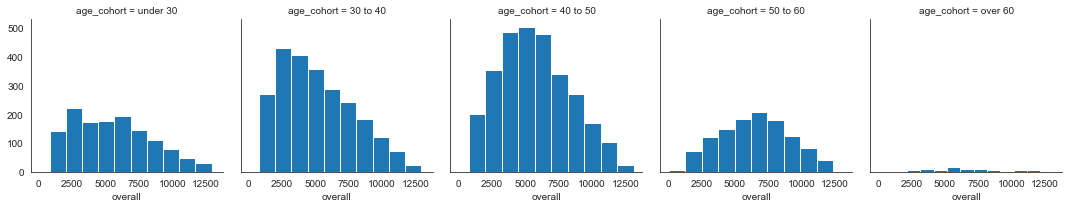

In [176]:
print('Cluster 0, 1, and 2 in descending order')

g = sns.FacetGrid(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 0], 
                  col="age_cohort", 
                  col_order=age_cohort_order)
g.map(plt.hist, "overall")
g = sns.FacetGrid(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 1], 
                  col="age_cohort", 
                  col_order=age_cohort_order)
g.map(plt.hist, "overall")
g = sns.FacetGrid(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 2], 
                  col="age_cohort", 
                  col_order=age_cohort_order)
g.map(plt.hist, "overall")


In [164]:
print('Cluster 0 average age: ' + str(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 0].age.mean()))
print('Cluster 1 average age: ' + str(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 1].age.mean()))
print('Cluster 2 average age: ' + str(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 2].age.mean()))


Cluster 0 average age: 33.33856209150327
Cluster 1 average age: 43.956674057649664
Cluster 2 average age: 39.74152327935223


In [165]:
print('Cluster 0 average time: ' + str(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 0].official.mean()))
print('Cluster 1 average time: ' + str(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 1].official.mean()))
print('Cluster 2 average time: ' + str(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 2].official.mean()))


Cluster 0 average time: 164.21649673202614
Cluster 1 average time: 265.0512048780488
Cluster 2 average time: 195.32770622469636


In [180]:
print('Cluster 0 total members: ' + str(len(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 0].index)))
print('Cluster 1 total members: ' + str(len(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 1].index)))
print('Cluster 2 total members: ' + str(len(marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 2].index)))


Cluster 0 total members: 1530
Cluster 1 total members: 22550
Cluster 2 total members: 7904


In [187]:
cluster0 = marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 0]
print('Cluster 0 total male runners: ' + str(len(cluster0.loc[cluster0['gender'] == 'M'].index)))
print('Cluster 0 total female runners: ' + str(len(cluster0.loc[cluster0['gender'] == 'F'].index)))

cluster1 = marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 1]
print('Cluster 1 total male runners: ' + str(len(cluster1.loc[cluster1['gender'] == 'M'].index)))
print('Cluster 1 total female runners: ' + str(len(cluster1.loc[cluster1['gender'] == 'F'].index)))

cluster2 = marathon_3_cluster.loc[marathon_3_cluster['3_cluster'] == 2]
print('Cluster 2 total male runners: ' + str(len(cluster2.loc[cluster2['gender'] == 'M'].index)))
print('Cluster 2 total female runners: ' + str(len(cluster2.loc[cluster2['gender'] == 'F'].index)))


Cluster 0 total male runners: 1458
Cluster 0 total female runners: 72
Cluster 1 total male runners: 10024
Cluster 1 total female runners: 12526
Cluster 2 total male runners: 6135
Cluster 2 total female runners: 1769
